<a href="https://colab.research.google.com/github/MDROKONMIA/SoftMax-Regression/blob/main/Cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 89.6MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s] 


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [5]:
#generators
train_dataset=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_dataset=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalizing

def normalize(image,label):
    image=tf.cast(image/256.,tf.float32 )
    return image, label
train_dataset=train_dataset.map(normalize)
validation_dataset=validation_dataset.map(normalize)

In [7]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
#create CNN model
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer="adam",loss='binary_crossentropy', metrics=['accuracy'] )

In [10]:
history=model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 96s 135ms/step - loss: 0.6231 - accuracy: 0.6373 - val_loss: 0.5746 - val_accuracy: 0.7116
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5051 - accuracy: 0.7480 - val_loss: 0.4623 - val_accuracy: 0.7752
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4088 - accuracy: 0.8109 - val_loss: 0.4388 - val_accuracy: 0.8022
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3077 - accuracy: 0.8650 - val_loss: 0.5684 - val_accuracy: 0.7932
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1870 - accuracy: 0.9237 - val_loss: 0.8134 - val_accuracy: 0.7778
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1035 - accuracy: 0.9602 - val_loss: 1.0821 - val_accuracy: 0.7624
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0762 - accuracy: 0.9747 - val_loss: 0.8924 - val_accurac

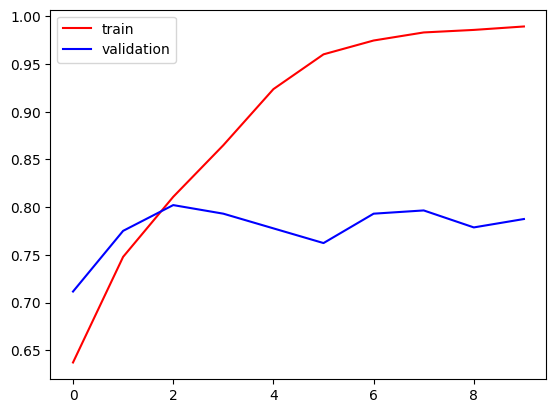

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

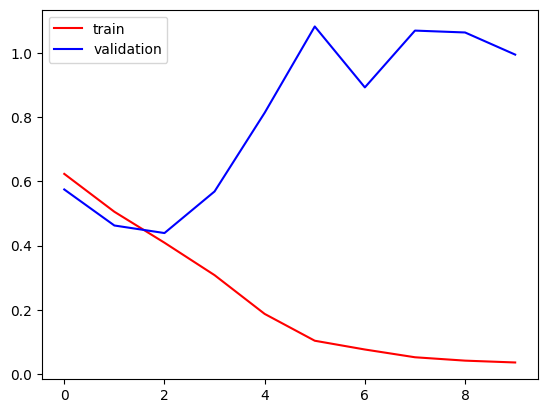

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2
test_img=cv2.imread('/content/cat.jpeg')

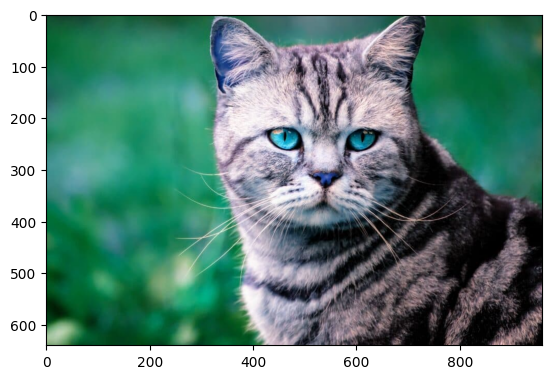

In [16]:
plt.imshow(test_img)

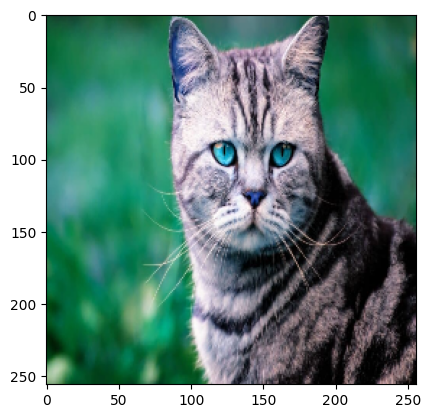

In [17]:
test_img=cv2.resize(test_img, (256,256))
plt.imshow(test_img)

In [18]:
test_input=test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 1s 725ms/step


array([[0.]], dtype=float32)

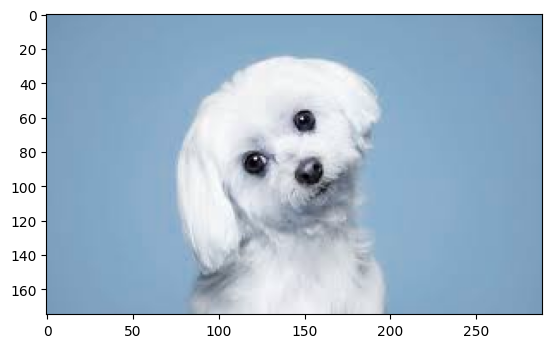

In [20]:
test_img=cv2.imread('/content/dog.jpeg')
plt.imshow(test_img)

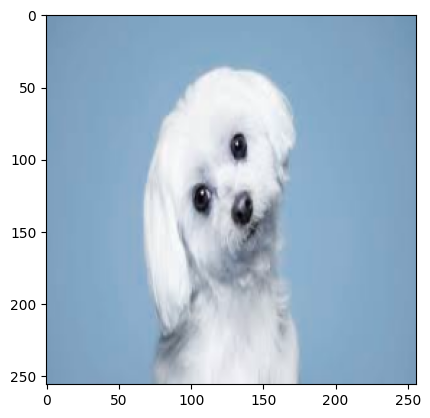

In [21]:
test_img=cv2.resize(test_img, (256,256))
plt.imshow(test_img)

In [22]:
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)